In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri, cm

In [3]:
# Simulation Parameters
nx = 5
ny = 5
nz = 5

Lx = 1.0
Ly = 1.0
Lz = 1.0

alpha = 1.0
rho = 1.0
cv = 1.0
Q = 0
npoints = nx*ny*nz
ne = 2*(nx - 1)*(ny - 1)*(nz - 1)

In [4]:
# Boundary conditions
T1 = lambda x, y: 10 # side 0123
T2 = lambda x, z: 20 # side 4015
T3 = lambda x, y: 10 # side 4567
T4 = lambda x, z: 20 # side 7326
T5 = lambda y, z: 10 # side 4730
T6 = lambda y, z: 20 # side 5621

In [5]:
# geracao de pontos e malha
# Xv = np.sin(np.linspace(0, np.pi/2, nx))*Lx
# Yv = np.sin(np.linspace(0, np.pi/2, ny))*Ly
Xv = np.linspace(0, Lx, nx)
Yv = np.linspace(0, Ly, ny)
Zv = np.linspace(0, Lz, nz)

X, Y, Z = np.meshgrid(Xv, Yv, Zv)

X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)
Z = np.reshape(Z,npoints)

triang = tri.Triangulation(X, Y, Z)
IEN = triang.triangles

ValueError: triangles must be a (N, 3) int array, but found shape (125,)

In [144]:
# nos de condicao de contorno
cc1 = np.arange(           start = 0,           stop = nx,  step = 1) # bottom 
cc2 = np.arange(          start = nx, stop = npoints - nx, step = nx) # left
cc3 = np.arange(start = npoints - nx,      stop = npoints,  step = 1) # top
cc4 = np.arange(    start = 2*nx - 1, stop = npoints - nx, step = nx) # right

cc = np.hstack([cc1,cc2,cc3,cc4])

In [145]:
#plt.plot(X,Y,'ko')
#plt.triplot(X,Y,IEN)
#plt.show()

# construcao das matrizes K e M
K = np.zeros((npoints,npoints), dtype = float)
M = np.zeros((npoints,npoints), dtype = float)

for e in range(0,ne):
 # definicao das matrizes do elemento
 v1, v2, v3 = IEN[e]

 area = 0.5*np.linalg.det(np.array([[1,X[v1],Y[v1]],
                                    [1,X[v2],Y[v2]],
                                    [1,X[v3],Y[v3]]]))
 
 melem = (area/12.0)*np.array([[2,1,1],
                               [1,2,1],
                               [1,1,2]])
 
 bi = Y[v2]-Y[v3]
 bj = Y[v3]-Y[v1]
 bk = Y[v1]-Y[v2]
 ci = X[v3]-X[v2]
 cj = X[v1]-X[v3]
 ck = X[v2]-X[v1]

 kxelem = (alpha/(4*area))*np.array([[bi*bi,bi*bj,bi*bk],
                                     [bj*bi,bj*bj,bj*bk],
                                     [bk*bi,bk*bj,bk*bk]])
 
 kyelem = (alpha/(4*area))*np.array([[ci*ci,ci*cj,ci*ck],
                                     [cj*ci,cj*cj,cj*ck],
                                     [ck*ci,ck*cj,ck*ck]])
 kelem = kxelem + kyelem

 for ilocal in range(3):
    iglobal = IEN[e,ilocal]

    for jlocal in range(3):
        jglobal = IEN[e,jlocal]

        K[iglobal,jglobal] += kelem[ilocal,jlocal]
        M[iglobal,jglobal] += melem[ilocal,jlocal]

In [146]:
qvec = (Q/(rho*cv)) * np.ones( (npoints),dtype='float' )
qvec = np.full(npoints, Q/(rho*cv) ,dtype='float' )

A = K.copy()
b = M@qvec

In [147]:
# imposicao das condicoes de contorno de Dirichlet
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 A[i,:] = 0.0
 A[i,i] = 1.0
 b[i] = T1(X[i])

# left boundary
for i in cc2:
 A[i,:] = 0.0
 A[i,i] = 1.0
 b[i] = T2(Y[i])

# top boundary
for i in cc3:
 A[i,:] = 0.0
 A[i,i] = 1.0
 b[i] = T3(X[i])

# right boundary
for i in cc4:
 A[i,:] = 0.0
 A[i,i] = 1.0
 b[i] = T4(Y[i])

In [148]:
# linear system solution
# first, we inverse the A matrix
Ainv = np.linalg.inv(A)

In [149]:
T = Ainv@b

In [150]:
# For graphical purposes
Tmin = min(T)
Tmax = max(T)

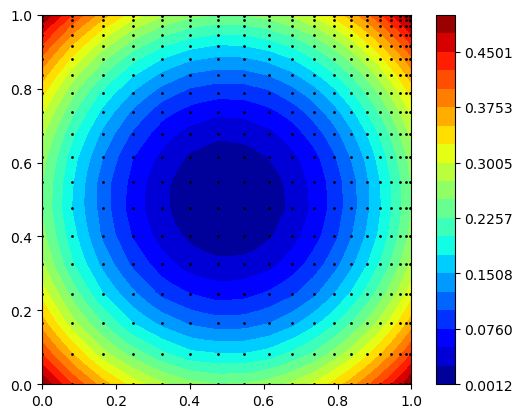

In [151]:
# Temperature contourplot
ax = plt.axes()
ax.set_aspect('equal')
ax.triplot(triang,'ko-', markersize = 1)
surf = ax.tricontourf(triang,T,cmap='jet', levels = np.linspace(Tmin, Tmax, 21))
plt.colorbar(surf)
plt.show()

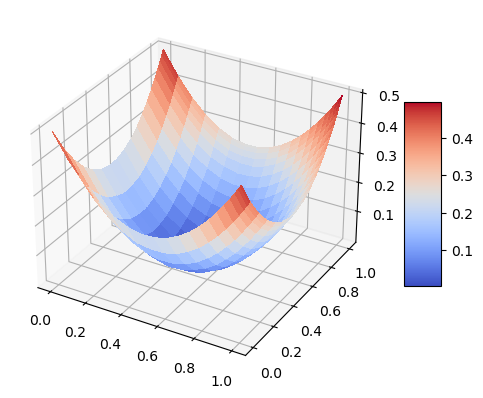

In [152]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Xz = np.reshape(X, (nx, ny))
Yz = np.reshape(Y, (nx, ny))
Tz = np.reshape(T, (nx, ny))

# Plot the surface.
surf = ax.plot_surface(Xz, Yz, Tz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()